<a href="https://colab.research.google.com/github/tsenga2/keio-senga-seminar/blob/main/figure5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**データの準備**
---

Google Drive のファイルを読み込む準備

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

pandasで読み込む準備

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)

ファイルをダウンロード

In [3]:
fileDownloaded = drive.CreateFile({'id': '1cMuRB0GcrqZJgP9q1DBY6TZ52W4pjyS-'})
fileDownloaded.GetContentFile('NikkeiNeeds.csv')

# データの整理

pandasで読み込み

In [5]:
df = pd.read_csv('NikkeiNeeds.csv', encoding = "cp932")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 12 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   日経会社コード                                                        1840 non-null   int64  
 1   企業名称                                                           1840 non-null   object 
 2   株式コード                                                          1840 non-null   int64  
 3   決算期                                                            1840 non-null   object 
 4   決算種別                                                           1840 non-null   int64  
 5   連結基準                                                           1840 non-null   int64  
 6   <株主資本等変動計算書>【純資産合計／資本】剰余金の配当(百万円)[G130]                        394 non-null    float64
 7   <【更新中止】利益処分計算書（単独）>普通株式配当金(百万円)[L015]                       

名前の変更

In [7]:
df = df.rename(columns={'日経会社コード':'gvkey'})
df = df.rename(columns={'株式コード':'sc'})
df = df.rename(columns={'決算期':'fy'})
df = df.rename(columns={'<【更新中止】利益処分計算書（単独）>普通株式配当金(百万円)[L015]':'asdvc'})
df = df.rename(columns={'<貸借対照表（資産）>資産合計(百万円)[B110]':'ta'})
df = df.rename(columns={'<損益計算書（期首からの累計期間）>親会社株主に帰属する当期純利益（連結）／当期利益（単独）［累計］(百万円)[D110]':'ni'})

必要な列を抽出

In [8]:
df = df[['gvkey', 'sc', 'fy', 'asdvc', 'ta', 'ni']]

NaNを含む行を削除

In [9]:
df = df.dropna()

fy列の最後の2文字を取り出して西暦に直し、indexにする。

In [10]:
df['fy'] = df['fy'].str[-2:]
df['fy'] = df['fy'].astype(int)

In [11]:
for i in range(len(df)):
   if df.loc[i,'fy'] >= 75 :
     df.loc[i,'fy'] = 1900 + df.loc[i,'fy']
   else : df.loc[i,'fy'] = 2000 + df.loc[i,'fy']

KeyError: ignored

In [12]:
df = df.set_index('fy')

グラフ項目の計算

In [13]:
df['asdvc/ni'] = df['asdvc']/df['ni']
df['asdvc/ta'] = df['asdvc']/df['ta']

# データの確認

In [14]:
df.head()

,gvkey,sc,asdvc,ta,ni,asdvc/ni,asdvc/ta
fy,,,,,,,
79,322,3116,250.0,13843,962,0.259875,0.018060
80,322,3116,250.0,13520,606,0.412541,0.018491
81,322,3116,200.0,13995,223,0.896861,0.014291
82,322,3116,200.0,15207,246,0.813008,0.013152
83,322,3116,150.0,15690,113,1.327434,0.009560


In [15]:
df.describe()

,gvkey,sc,asdvc,ta,ni,asdvc/ni,asdvc/ta
count,1412.000000,1412.000000,1412.000000,1.412000e+03,1.412000e+03,1412.000000,1412.000000
mean,6371.555949,6896.831445,2610.599858,3.688639e+05,1.410955e+04,0.188759,0.004769
std,10742.610750,973.543665,12972.739230,1.067307e+06,6.630744e+04,1.668081,0.002720
min,322.000000,3116.000000,10.000000,3.293000e+03,-6.104000e+04,-55.741379,0.000496
25%,1372.000000,7205.000000,108.750000,2.560300e+04,5.177500e+02,0.116374,0.003074
50%,1389.000000,7244.000000,224.000000,5.230150e+04,1.155500e+03,0.174407,0.004253
75%,12206.000000,7271.000000,691.000000,1.795945e+05,3.916500e+03,0.283438,0.005580
max,91029.000000,7313.000000,236195.000000,1.066117e+07,1.138144e+06,6.493671,0.029791


asdvcの値はミニマムでも正になっており、無配当のデータはない。

# グラフ作成準備

グラフ作成ライブラリを読み込む

In [16]:
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

使用可能なグラフスタイルを一覧表示

In [17]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

グラフスタイルを選択

In [18]:
plt.style.use('ggplot')

# Eually Weighted Average


各年ごとの平均データを作成

In [19]:
dfe = df[['asdvc/ni', 'asdvc/ta']].mean(level=0)
dfe

,asdvc/ni,asdvc/ta
fy,,
79,0.193110,0.006208
80,0.188280,0.006125
81,0.199960,0.005610
82,0.224288,0.005353
83,0.404491,0.005148
84,0.241853,0.004908
85,0.309693,0.004948
86,0.199498,0.004652
87,0.263786,0.004455


A. The Ratio of Total Payout to Net Income

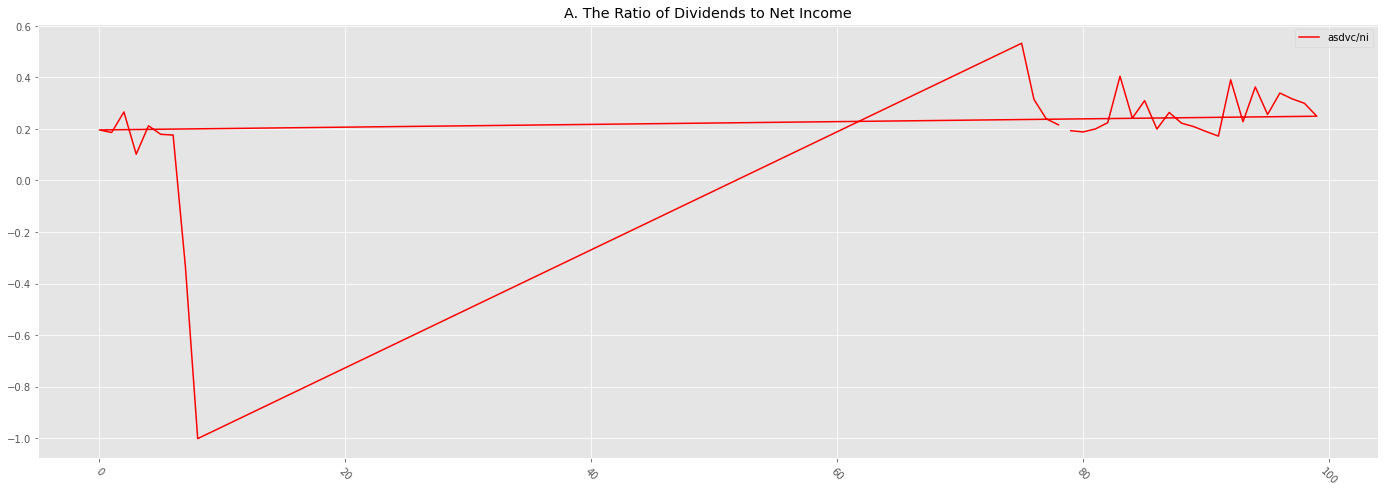

In [20]:
dfe[['asdvc/ni']].plot.line(
    title='A. The Ratio of Dividends to Net Income', 
    color = ("r") , xlabel = "", figsize=(24, 8), rot=-45)

B. Dividendsut (All as a Fraction of Toatal Assets)

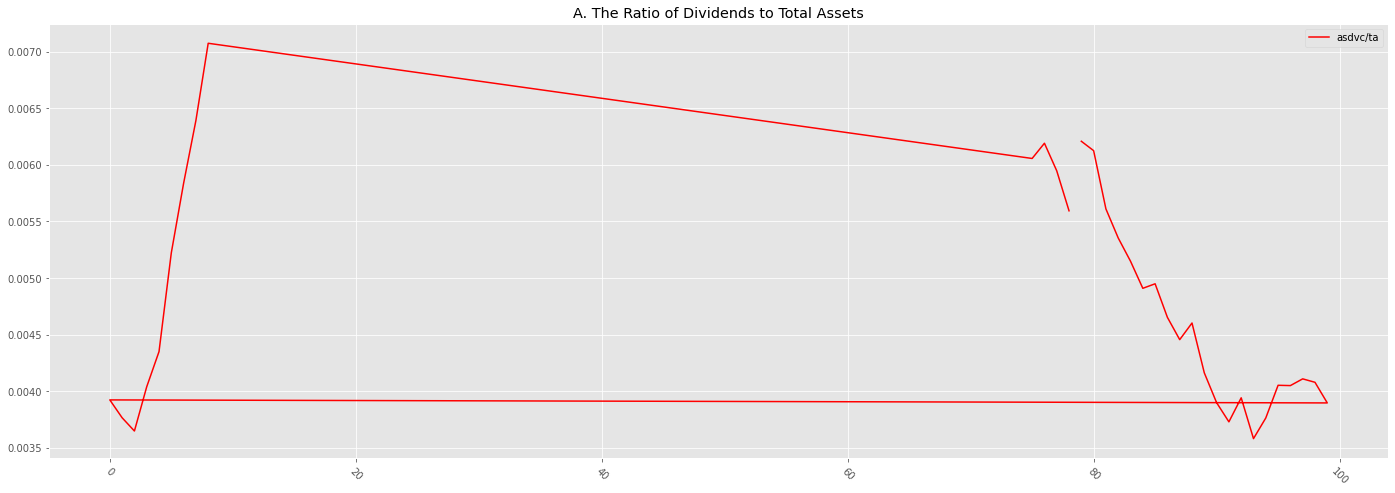

In [21]:
dfe[['asdvc/ta']].plot.line(
     title='A. The Ratio of Dividends to Total Assets', 
     color = ("r"), xlabel = "", figsize=(24, 8), rot=-45)

# Asset-Weighted Average

必要な項目を抽出し、まず、個々の企業、年度で対応するtaをかける

In [22]:
dfa = df[['ta', 'asdvc/ni', 'asdvc/ta']]

In [23]:
for i in range(1,len(dfa.columns)):
   dfa.iloc[:,i] = dfa.iloc[:,i] * df['ta']

各企業のデータを年度で合計し、各項目をtaの年度ごとの合計で割る

In [24]:
dfa = dfa.sum(level=0)

In [25]:
for i in range(len(dfa.columns)):
   dfa.iloc[:,i] = dfa.iloc[:,i] / dfa['ta']

In [26]:
dfa

,ta,asdvc/ni,asdvc/ta
fy,,,
79,1.0,9.319830e+05,33409.0
80,1.0,1.047819e+06,37857.0
81,1.0,1.125474e+06,41135.0
82,1.0,1.357070e+06,45380.0
83,1.0,1.872857e+06,53457.0
84,1.0,1.690061e+06,55948.0
85,1.0,1.744888e+06,62600.0
86,1.0,1.985222e+06,62396.0
87,1.0,3.481569e+06,72375.0


A. The Ratio of Total Payout to Net Income

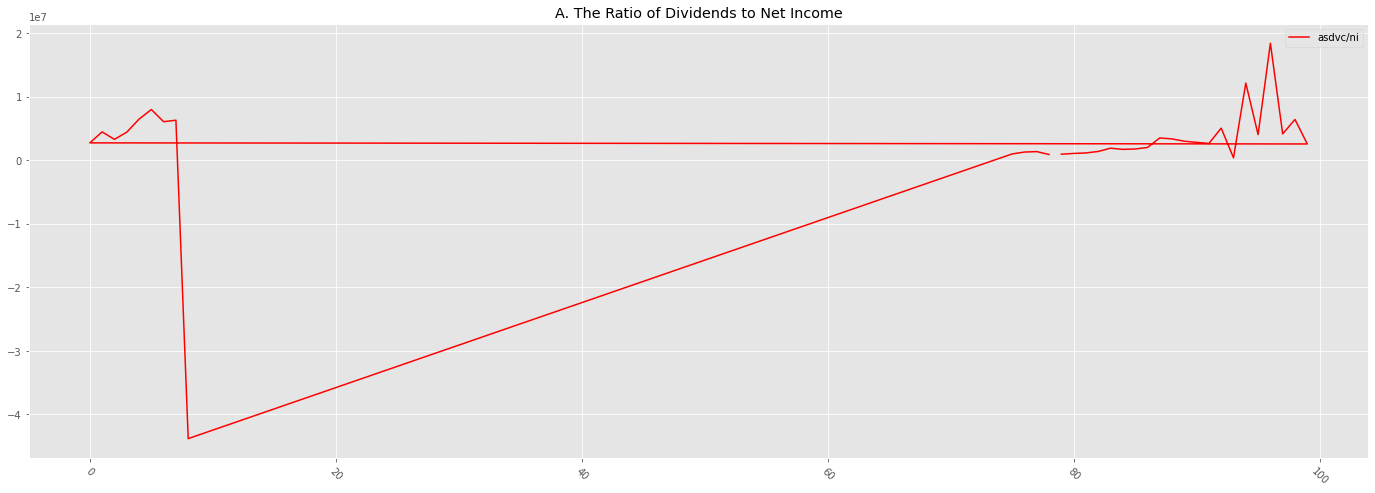

In [27]:
dfa[['asdvc/ni']].plot.line(
    title='A. The Ratio of Dividends to Net Income', 
    color = ("r") , xlabel = "", figsize=(24, 8), rot=-45)

B. Dividendsut (All as a Fraction of Toatal Assets)

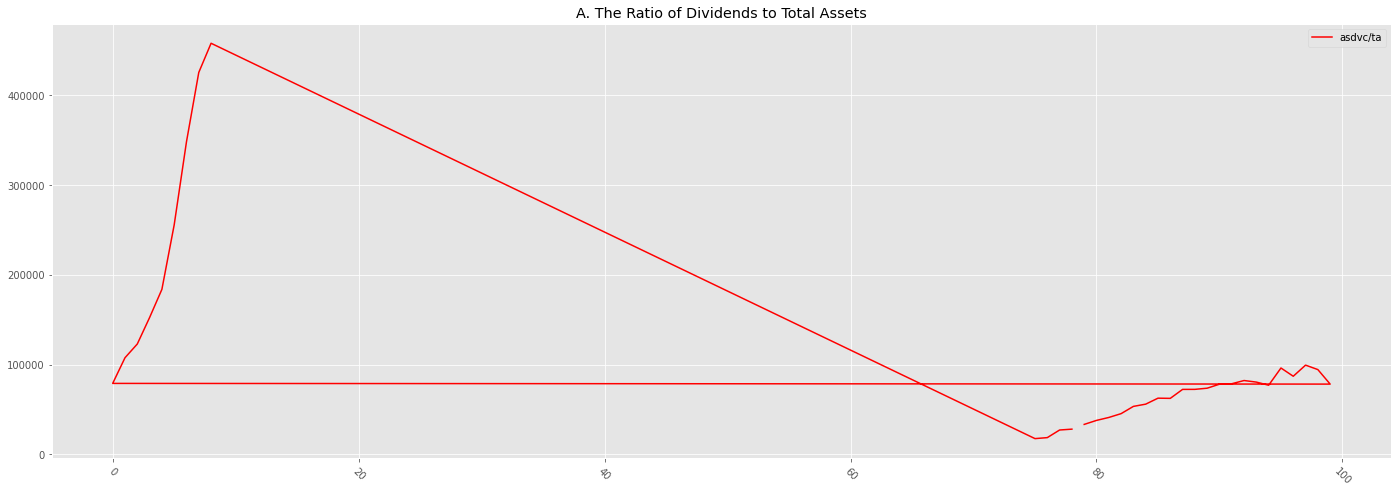

In [28]:
dfa[['asdvc/ta']].plot.line(
     title='A. The Ratio of Dividends to Total Assets', 
     color = ("r"), xlabel = "", figsize=(24, 8), rot=-45)

# 項目名略称一覧

日経会社コード　gvkey

株式コード　sc

決算期　fy

**利益処分計算書**

　普通株式配当金　asdvc　（配当したら正）

**P/L**

　利益　ni

**B/S**

　総資産　ta